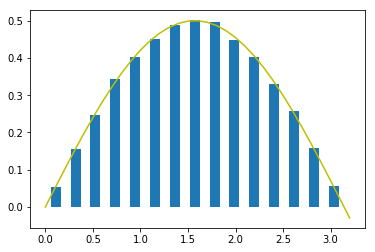

In [5]:
#1. Квантильне перетворення
#1.1 Задана щільність

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import uniform

f = uniform(-0.5, 1)
def function(y):
    return np.arcsin(y / a) + np.pi / 2

#  a*cos(x)| from 0 to pi = 1
#2*a = 1

a = 1/2 
x = np.arange(0, np.pi + 0.1, 0.1)
plt.plot(x, a * np.sin(x), 'y')
b = function(f.rvs(size=100000))
plt.hist(b, density=True, rwidth=0.5, bins=15)
plt.show()

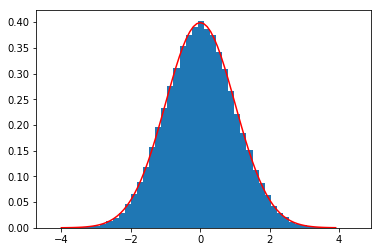

In [6]:
#1.2 Нормальний розподіл

from scipy.stats import norm

x = np.arange(-4, 4, 0.1)
plt.hist(norm.ppf(uniform(0, 1).rvs(100000)), density=True, bins=50)
plt.plot(x, norm.pdf(x), 'r')
plt.show()

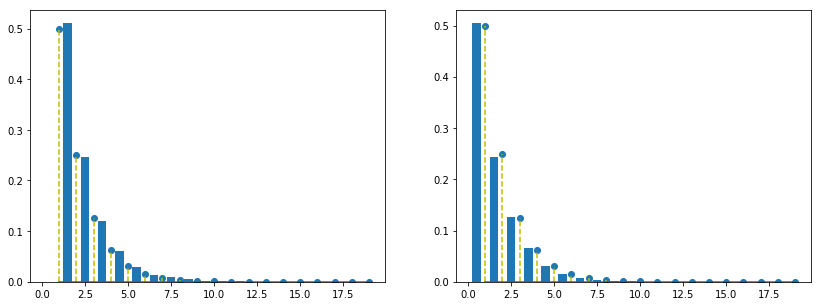

In [8]:
#2. Відсутність пам'яті

from scipy.stats import geom

a = geom(0.5)
d = plt.gcf()
d.set_size_inches(14, 5)
b = a.rvs(size = 10000) - 1
x = np.arange(1, 20,1) 
a1 = a.rvs(size=10000)
   
plt.subplot(121)
a1 = a.rvs(size=10000)
plt.stem(x, a.pmf(x), 'y--')
plt.hist(a1, density=True, rwidth=0.5, bins=range(15))
    
plt.subplot(122)
plt.stem(x, a.pmf(x), 'y--')
plt.hist(b, density=True, rwidth=0.5, bins=range(15))
plt.show()

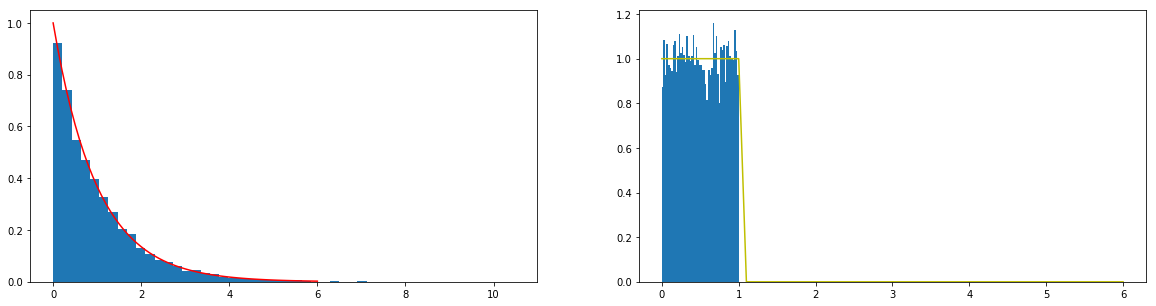

In [13]:
#3.1 Експонента

from scipy.stats import expon

ex = expon.rvs(size=10000)

x = np.arange(0, 6.1, 0.1)

plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.hist(ex, density=True, bins=50)
plt.plot(x, expon.pdf(x), 'r')

plt.subplot(122)
plt.hist(expon.pdf(ex), density=True, bins=50)
plt.plot(x, uniform.pdf(x), 'y')


plt.show()



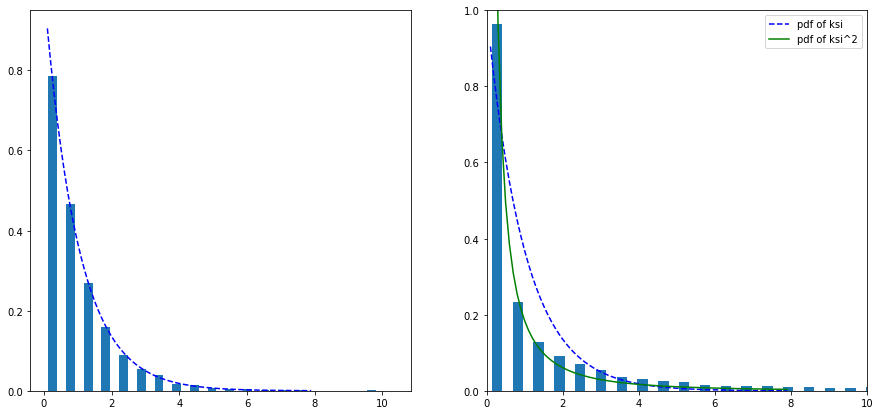

In [17]:
#3.2 Квадрат

ex = expon()

a1 = ex.rvs(10000)
x = np.arange(0.1, 8, 0.1)
f = plt.gcf()
f.set_size_inches(15, 7)


plt.subplot(121)
plt.hist(a1, bins=20, density=True, rwidth=0.5)
plt.plot(x, ex.pdf(x), 'b--')


plt.subplot(122)
plt.hist(a1 ** 2, bins=200, density=True, rwidth=0.5)
plt.plot(x, ex.pdf(x), 'b--', label='pdf of ksi')
plt.plot(x, np.exp(-np.sqrt(x)) / (2 * x),'g', label='pdf of ksi^2')
plt.axis([0,10,0,1])

plt.legend(loc='best')
plt.show()

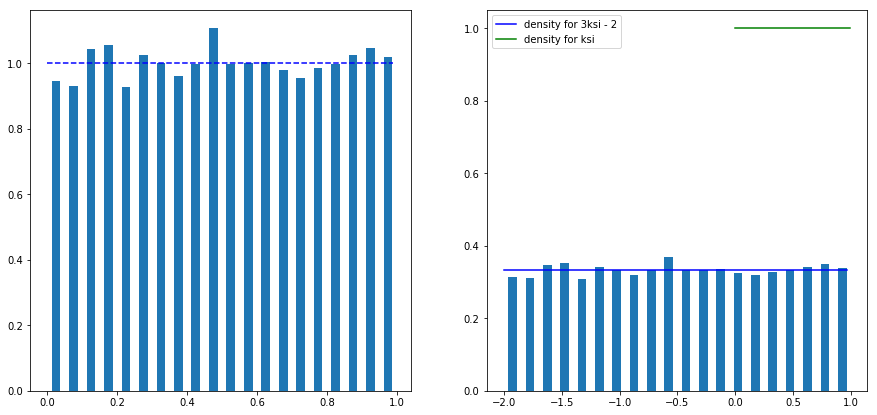

In [19]:
#4.1 Лінійне перетворення

f = plt.gcf()
f.set_size_inches(15, 7)

a = uniform(0, 1)
n = 10000
b = a.rvs(n)
x = np.arange(0, 1, 0.01)


plt.subplot(121)
plt.hist(b, bins=20, density=True, rwidth=0.5)
plt.plot(x, a.pdf(x), 'b--')

plt.subplot(122)
plt.hist(3*b - 2, bins=20, density=True, rwidth=0.5)
plt.plot(3*x - 2, a.pdf((x + 2) / 3) / 3, 'b', label='density for 3ksi - 2')
plt.plot(x, a.pdf(x),'g', label='density for ksi')
plt.legend(loc='best')

plt.show()

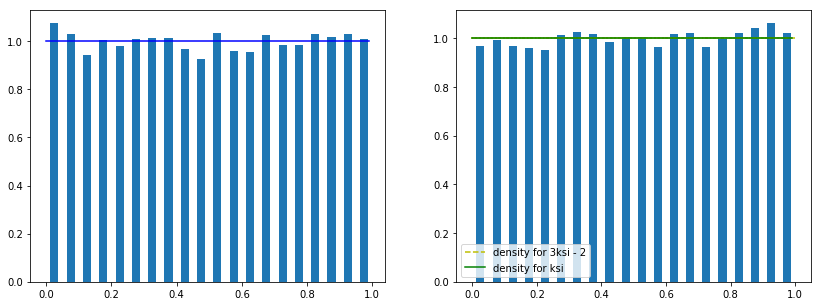

In [20]:
#4.2 Модуль від лінійного перетворення

f = plt.gcf()
f.set_size_inches(14, 5)
b = uniform(0, 1)
n = 10000
a = b.rvs(n)

 
plt.subplot(121)
plt.hist(a, density=True, rwidth=0.5, bins=20)
plt.plot(x, b.pdf(x), 'b')

plt.subplot(122)
plt.hist(abs(2*a - 1), density=True, rwidth=0.5, bins=20)
plt.plot(np.abs(2*x - 1), b.pdf((x + 1) / 2) + b.pdf(-(x + 1) / 2), 'y--', label='density for 3ksi - 2')


plt.plot(x, [1]*len(x),'g', label='density for ksi')
plt.legend(loc='best')

plt.show()

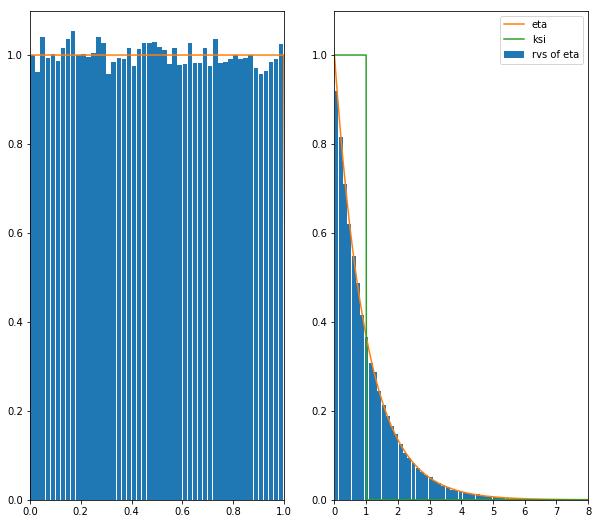

In [3]:
#4.3 Логарифм

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

rvs = uniform.rvs(0,1, size=100000)
x = np.arange(0, 10, 0.01)

fig, axs = plt.subplots(1, 2,figsize=[10,9])
axs[0].hist(rvs, bins=50, density=True, rwidth=0.9)
axs[0].plot(x, uniform(0).pdf(x))
axs[0].set_xlim([0,1])
axs[0].set_ylim([0,1.1])
eta = lambda x: np.exp(-x)

axs[1].hist(-np.log(rvs), bins=100, density=True, label="rvs of eta", rwidth=0.9)
axs[1].plot(x, list(map(eta,x)), label = "eta")
axs[1].plot(x, uniform(0,1).pdf(x), label = "ksi")
axs[1].set_xlim([0,8])
axs[1].set_ylim([0,1.1])
plt.legend()
plt.show()

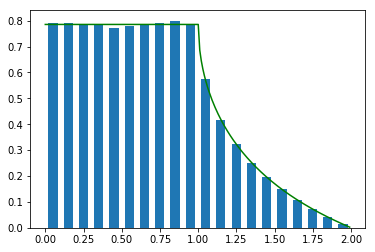

In [11]:
#5. Одиничний квадрат

from scipy.stats import uniform
ki = (uniform(0, 1), uniform(0, 1))

#ksi1 = x^2 + y^2
rand = ki[0].rvs(100000) ** 2 + ki[1].rvs(100000) ** 2
x = np.arange(0, 2, 0.01)

def ki1(x):
    res = np.pi / 4 if 0 <= x <= 1 else 0
    res += (np.pi/4 - np.arccos(1 / np.sqrt(x)) + 1 / (2 * np.sqrt(x - 1))) if 1 < x <= 2 else 0
    res -= 1 / (2 * np.sqrt(x - 1)) if 1 < x <= 2 else 0
    return res

plt.hist(rand, bins=20, density=True, rwidth=0.6)
plt.plot(x, list(map(ki1, x)),'g')
plt.show()

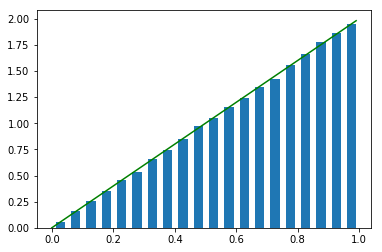

In [10]:
#ksi2 = max (x, y)

rand = np.array([max(a, b) for a, b in zip(ki[0].rvs(100000), ki[1].rvs(100000))])
x = np.arange(0, 1, 0.01)

plt.hist(rand, bins=20, density=True, rwidth=0.6)
plt.plot(x, 2*x,'g')
plt.show()

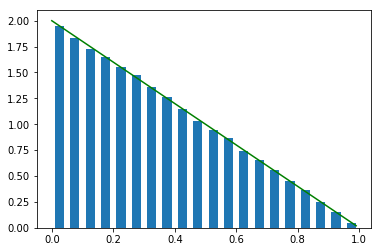

In [13]:
#ksi3 = |x - y|

rand = np.array([abs(a - b) for a, b in zip(ki[0].rvs(100000), ki[1].rvs(100000))])
x = np.arange(0, 1, 0.01)

plt.hist(rand, bins=20, density=True, rwidth=0.6)
plt.plot(x, 2 - 2*x,'g')
plt.show()